Combinatorial **Bees Algorithm** to solve TSP (TSPLIB)

In this work, there is **Domino sequence** constructive heuristic for TSP.

[1] Pham, D. T., Ghanbarzadeh, A., Koç, E., Otri, S., Rahim, S., & Zaidi, M. (2006). The bees algorithm—a novel tool for complex optimisation problems. In Intelligent production machines and systems (pp. 454-459). Elsevier Science Ltd.

[2] Ismail, A. H., Hartono, N., Zeybek, S., and Pham, D. T. (2020). Using the bees algorithmto solve combinatorial optimisation problems for TSPLIB.IOP Conference Series:Materials Science and Engineering, 847:012027.

[3] Ismail, A. H. (2019, May). Domino algorithm: a novel constructive heuristics for traveling salesman problem. In IOP Conference Series: Materials Science and Engineering (Vol. 528, No. 1, p. 012043). IOP Publishing.

In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [34]:
print("Select your Problem -insert a number 1 to 6-")
print(" 1.Eil51")
print(" 2.Berlin52")
print(" 3.St70")
print(" 4.Eil76")
print(" 5.Pr76")
print(" 6.Rat99")
val = input("Please insert your number 1 to 6: ")
val = int(val)
print("Select your Global Search operator -insert a number 0 to 2-")
print(" 0 --> Random Permutation")
print(" 1 --> Nearest Neighbour")
print(" 2 --> Domino Sequence")
GS = input("Please insert your Global Search Operator 0 to 2: ")
GS = int(GS)
if GS == 2:
    pl = input("How many players?: ")
    pl = int(pl)
else:
    pl=0
print("Select your Local Search operator -insert a number 0 to 2-")
print(" 0 --> Combination of Swap, Reversion, and Insertion")
print(" 1 --> Swap")
print(" 2 --> Reversion")
print(" 3 --> Insertion")
LS = input("Please insert your Local Search Operator 0 to 3: ")
LS = int(LS)
# LS=0
maxIt = input("Please insert your Max Iteration 100 to 1000: ")
maxIt = int(maxIt)
# maxIt=100
nScoutBee = input("Please insert your amount of Scout Bee 10 to 80: ")
nScoutBee = int(nScoutBee)
# nScoutBee=50

Select your Problem -insert a number 1 to 6-
 1.Eil51
 2.Berlin52
 3.St70
 4.Eil76
 5.Pr76
 6.Rat99
Please insert your number 1 to 6: 1
Select your Global Search operator -insert a number 0 to 2-
 0 --> Random Permutation
 1 --> Nearest Neighbour
 2 --> Domino Sequence
Please insert your Global Search Operator 0 to 2: 0
Select your Local Search operator -insert a number 0 to 2-
 0 --> Combination of Swap, Reversion, and Insertion
 1 --> Swap
 2 --> Reversion
 3 --> Insertion
Please insert your Local Search Operator 0 to 3: 2
Please insert your Max Iteration 100 to 1000: 100
Please insert your amount of Scout Bee 10 to 80: 20


In [35]:
!pip install catboost
import catboost as cb
from catboost import CatBoostRegressor 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
cat_model = CatBoostRegressor(loss_function='RMSE',logging_level='Silent')

In [37]:
import pandas as pd

In [38]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [39]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [40]:
downloaded = drive.CreateFile({'id':'1ASAfDG2PG-oQ5lbjHubCf6HV0oGZcwj3'}) 
downloaded.GetContentFile('UAV_DATA.csv') 

In [41]:
dataset=pd.read_csv("UAV_DATA.csv")

In [42]:
dataset_filtered = dataset[dataset['Final UAV Speed'] >= 0]
x = dataset_filtered[['UAV Speed', 'UAV Payload','windspeed','windgust','cos(gap angle)']]
y = dataset_filtered['Final UAV Speed']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [44]:
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [45]:
tuned_cat_model=CatBoostRegressor(iterations=500, max_depth=5, learning_rate=0.05)

In [46]:
tuned_cat_model.fit(x_train,y_train,logging_level='Silent')


In [47]:
def cosgapangle(DirectionVector,WindVector):
  vector_1=DirectionVector
  vector_2=WindVector
  unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
  unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
  dot_product = np.dot(unit_vector_1, unit_vector_2)
  angle = np.arccos(dot_product)
  return(math.cos(angle))

In [48]:
UAVspeed=int(input("Enter UAV Speed : "))
UAVPayload=int(input("Enter UAV Payload : "))
windspeed=int(input("Enter windspeed : "))
windgust=int(input("Enter Wind Gust : "))
winddir=int(input("Enter wind direction(angle in degrees) : "))

Enter UAV Speed : 25
Enter UAV Payload : 15
Enter windspeed : 10
Enter Wind Gust : 5
Enter wind direction(angle in degrees) : 65


In [49]:
Vwind=[windspeed*np.cos(np.radians(winddir)),windspeed*np.sin(np.radians(winddir))]

In [50]:
class Model:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.n = len(x)
    def Dis (self):
        n = self.n
        D = []
        for i in range (n):
          for j in range (n):
              inputparametersUAV=[UAVspeed, UAVPayload,windspeed,windgust,cosgapangle([x[j]-x[i],y[j]-y[i]],Vwind)]
              ans=round(np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2))
              ans=ans/tuned_cat_model.predict(inputparametersUAV)
              D.append(ans)
        D=np.array(D)
        D=D.reshape(n,n)
        return D

In [51]:
# Problem Selection
if val==7:
    Prob = 'Rat783'
    x = [13,49,105,239,110,270,53,131,88,97,244,78,254,174,10,200,29,62,123,141,201,167,39,219,14,200,204,220,100,127,151,188,88,231,167,140,26,253,101,270,44,181,245,211,30,54,69,116,7,159,189,13,73,175,213,2,25,77,142,222,143,165,94,125,67,237,46,150,200,38,132,179,228,107,243,82,113,207,261,37,51,163,71,255,140,154,248,8,104,208,222,180,196,68,96,232,24,84,138,40,267,121,180,217,120,259,58,120,250,20,59,107,218,246,31,98,15,140,226,75,154,240,20,160,0,149,45,113,177,185,204,200,89,260,262,60,89,136,17,110,190,240,90,164,221,3,24,231,254,154,63,77,47,181,31,60,126,207,170,36,81,61,111,140,144,217,188,230,119,237,266,17,151,220,42,103,252,210,99,20,249,137,170,59,0,20,76,174,195,121,194,212,267,248,46,52,182,100,259,109,170,78,200,70,31,120,226,82,140,158,138,137,171,240,2,13,113,255,141,201,175,60,232,84,124,170,58,190,187,36,46,107,116,269,3,14,158,249,21,95,213,11,76,179,224,28,236,51,60,119,148,218,140,266,30,76,163,94,103,188,228,152,193,246,252,1,73,86,125,7,206,207,44,55,158,30,25,44,231,260,120,175,185,228,265,68,166,191,15,109,82,130,97,37,147,238,243,219,68,113,171,23,130,243,6,86,106,193,224,186,145,160,14,258,270,97,47,155,58,210,119,130,67,220,80,152,56,30,254,140,230,92,117,220,50,145,194,184,71,175,250,226,15,36,120,83,104,170,208,99,162,9,82,152,253,21,267,44,16,141,210,220,9,175,79,50,267,196,239,113,68,127,187,243,140,89,108,219,229,150,160,32,178,11,200,156,30,201,58,23,130,67,100,257,3,237,46,221,246,181,28,178,200,266,73,266,39,108,109,115,137,215,259,188,190,167,133,143,126,94,238,60,14,85,41,73,221,245,6,78,118,183,67,152,126,6,156,55,113,208,137,248,46,266,17,177,218,149,83,193,231,24,31,223,66,90,102,26,166,77,258,268,63,140,198,30,113,220,130,133,238,5,80,179,200,150,97,223,253,181,246,16,103,30,40,58,169,200,180,266,100,64,187,146,80,159,161,220,1,103,115,210,248,259,131,35,122,56,210,238,15,50,85,182,94,266,44,74,80,191,130,169,258,177,210,13,160,209,102,30,67,227,4,35,118,123,205,250,60,68,131,141,166,212,230,245,71,12,240,251,27,92,183,38,266,127,83,152,192,7,55,42,107,114,150,105,230,13,56,146,174,185,194,241,164,9,141,96,43,25,201,230,257,132,263,33,119,86,178,64,129,231,216,32,239,11,46,52,73,140,145,259,119,207,162,215,106,245,123,180,30,61,77,151,200,222,99,182,83,265,112,127,264,8,255,25,58,105,200,141,165,197,153,66,242,135,218,12,174,9,79,188,239,80,48,140,221,32,99,186,133,30,154,164,57,249,96,250,27,70,108,174,237,198,10,123,207,210,120,224,40,10,187,208,76,214,262,29,48,63,90,262,10,112,56,135,246,30,155,67,86,90,171,226,127,233,2,82,121,154,160,208,231,1,40,58,103,200,28,143,252,260,95,253,230,198,243,42,109,117,130,76,188,216,14,142,167,233,263,180,180,64,96,15,39,52,107,9,72,143,193,208,68,247,47,183,22,138,157,167,228,213,252,118,121,207,84,70,83,50,30,157,171,215,50,141,260,94,8,169,251,38,130,132,240,76,114,12,105,184,199,229,231]
    y = [6,6,6,6,7,7,8,8,9,9,9,10,10,11,13,13,14,14,14,15,15,17,18,18,19,19,19,19,20,20,21,21,22,23,24,25,28,30,33,33,35,35,35,37,38,38,38,38,39,39,39,40,40,40,40,41,41,41,41,41,42,45,46,46,49,49,51,53,53,55,55,55,55,56,56,57,57,58,58,59,59,59,60,60,62,62,62,63,63,63,64,65,65,66,68,68,69,69,70,71,72,73,73,75,76,78,79,80,80,81,81,82,82,83,86,89,90,90,91,92,92,93,94,94,95,95,96,97,97,97,97,98,99,99,99,101,101,101,103,103,104,104,105,105,106,107,107,107,107,109,110,110,111,111,114,115,117,117,118,119,120,121,121,121,121,121,122,122,124,127,128,129,129,129,130,130,131,133,134,135,135,137,137,138,139,139,140,140,140,141,141,141,141,142,146,146,146,147,147,148,149,151,151,152,154,154,155,156,156,156,157,159,159,160,161,161,161,163,164,165,166,167,167,168,168,169,170,171,173,174,174,174,174,174,175,175,178,178,179,179,180,181,181,181,182,184,184,186,186,186,187,187,188,188,190,191,191,192,193,193,193,194,197,197,197,198,198,198,198,199,199,199,201,201,201,203,204,204,204,204,207,207,207,207,209,210,212,212,215,215,216,217,218,219,219,219,219,220,221,221,222,223,223,224,225,225,225,226,226,227,228,228,229,231,231,232,233,233,235,235,237,238,239,239,240,240,242,243,243,244,244,246,246,246,248,249,250,251,252,252,252,253,255,255,256,257,257,257,258,259,259,260,260,260,260,261,261,262,263,264,264,264,268,268,270,271,271,272,272,273,274,274,275,276,277,278,278,279,279,280,280,281,282,283,283,284,285,285,289,290,290,291,291,291,292,292,293,294,296,297,299,299,299,299,300,300,301,301,301,301,301,301,302,304,304,307,308,309,310,312,312,315,316,316,317,317,318,318,319,319,319,319,320,321,323,324,324,325,325,325,326,326,328,329,330,330,330,331,333,333,333,334,335,336,337,337,337,339,339,340,340,344,345,346,346,348,348,348,349,349,349,350,350,350,350,352,354,354,354,356,356,358,359,360,360,360,360,361,362,362,365,366,366,367,368,368,368,368,369,369,373,373,374,374,375,376,376,378,378,378,379,379,379,379,381,383,384,384,384,384,385,385,385,389,391,392,392,392,393,394,395,397,398,398,398,398,399,399,400,400,400,400,400,400,400,400,401,404,404,404,405,406,406,410,410,411,412,413,413,415,416,418,418,419,419,420,420,421,421,421,421,421,421,421,422,423,423,424,425,431,431,432,432,434,434,435,435,436,436,437,437,437,438,439,439,440,440,440,440,442,442,442,443,443,444,445,447,447,448,450,451,451,453,453,453,453,455,456,457,458,459,459,459,460,460,462,462,462,462,463,464,464,465,466,466,467,467,468,468,469,469,469,475,476,478,479,480,481,481,481,483,484,484,485,486,486,487,487,488,489,489,489,489,491,492,492,492,493,494,495,498,499,499,499,500,500,500,501,501,501,501,501,503,504,506,506,508,509,509,510,510,512,513,513,517,518,519,519,519,519,519,519,519,520,520,520,520,520,521,521,521,521,525,525,527,528,528,533,533,533,534,535,536,536,538,538,539,539,539,540,541,542,543,544,544,544,545,546,546,546,546,547,548,549,550,552,553,553,553,553,553,555,557,558,558,559,560,561,562,564,565,565,565,565,566,568,569,570,571,571,574,576,577,577,578,579,579,580,580,580,580,580,580]
    BKS = 8806
    Rat783 = Model(x,y)
    D=Rat783.Dis()
    n=Rat783.n
    Probx = Rat783.x
    Proby = Rat783.y
elif val == 1:
    Prob = 'Eil51'
    x = [37, 49, 52, 20, 40, 21, 17, 31, 52, 51, 42, 31, 5, 12, 36, 52, 27, 17, 13, 57, 62, 42, 16, 8, 7, 27, 30, 43, 58, 58, 37, 38, 46, 61, 62, 63, 32, 45, 59, 5, 10, 21, 5, 30, 39, 32, 25, 25, 48, 56, 30]
    y = [52, 49, 64, 26, 30, 47, 63, 62, 33, 21, 41, 32, 25, 42, 16, 41, 23, 33, 13, 58, 42, 57, 57, 52, 38, 68, 48, 67, 48, 27, 69, 46, 10, 33, 63, 69, 22, 35, 15, 6, 17, 10, 64, 15, 10, 39, 32, 55, 28, 37, 40]
    BKS = 426
    Eil51 = Model(x,y)
    D=Eil51.Dis()
    n=Eil51.n
    Probx = Eil51.x
    Proby = Eil51.y
elif val == 2:   
    Prob = 'Berlin52'
    x = [565, 25, 345, 945, 845, 880, 25, 525, 580, 650, 1605, 1220, 1465, 1530, 845, 725, 145, 415, 510, 560, 300, 520, 480, 835, 975, 1215, 1320, 1250, 660, 410, 420, 575, 1150, 700, 685, 685, 770, 795, 720, 760, 475, 95, 875, 700, 555, 830, 1170, 830, 605, 595, 1340, 1740]
    y = [575, 185, 750, 685, 655, 660, 230, 1000, 1175, 1130, 620, 580, 200, 5, 680, 370, 665, 635, 875, 365, 465, 585, 415, 625, 580, 245, 315, 400, 180, 250, 555, 665, 1160, 580, 595, 610, 610, 645, 635, 650, 960, 260, 920, 500, 815, 485, 65, 610, 625, 360, 725, 245]
    BKS = 7542
    Berlin52 = Model(x,y)
    D=Berlin52.Dis()
    n=Berlin52.n
    Probx = Berlin52.x
    Proby = Berlin52.y
elif val == 3:   
    Prob = 'St70'
    x = [64, 80, 69, 72, 48, 58, 81, 79, 30, 42, 7, 29, 78, 64, 95, 57, 40, 68, 92, 62, 28, 76, 67, 93, 6, 87, 30, 77, 78, 55, 82, 73, 20, 27, 95, 67, 48, 75, 8, 20, 54, 63, 44, 52, 12, 25, 58, 5, 90, 41, 25, 37, 56, 10, 98, 16, 89, 48, 81, 29, 17, 5, 79, 9, 17, 74, 10, 48, 83, 84]
    y = [96, 39, 23, 42, 67, 43, 34, 17, 23, 67, 76, 51, 92, 8, 57, 91, 35, 40, 34, 1, 43, 73, 88, 54, 8, 18, 9, 13, 94, 3, 88, 28, 55, 43, 86, 99, 83, 81, 19, 18, 38, 36, 33, 18, 13, 5, 85, 67, 9, 76, 76, 64, 63, 55, 7, 74, 60, 82, 76, 60, 22, 45, 70, 100, 82, 67, 68, 19, 86, 94]
    BKS = 675
    St70 = Model(x,y)
    D=St70.Dis()
    n=St70.n
    Probx = St70.x
    Proby = St70.y
elif val == 4:
    Prob = 'Eil76'
    x = [22, 36, 21, 45, 55, 33, 50, 55, 26, 40, 55, 35, 62, 62, 62, 21, 33, 9, 62, 66, 44, 26, 11, 7, 17, 41, 55, 35, 52, 43, 31, 22, 26, 50, 55, 54, 60, 47, 30, 30, 12, 15, 16, 21, 50, 51, 50, 48, 12, 15, 29, 54, 55, 67, 10, 6, 65, 40, 70, 64, 36, 30, 20, 15, 50, 57, 45, 38, 50, 66, 59, 35, 27, 40, 40, 40]
    y = [22, 26, 45, 35, 20, 34, 50, 45, 59, 66, 65, 51, 35, 57, 24, 36, 44, 56, 48, 14, 13, 13, 28, 43, 64, 46, 34, 16, 26, 26, 76, 53, 29, 40, 50, 10, 15, 66, 60, 50, 17, 14, 19, 48, 30, 42, 15, 21, 38, 56, 39, 38, 57, 41, 70, 25, 27, 60, 64, 4, 6, 20, 30, 5, 70, 72, 42, 33, 4, 8, 5, 60, 24, 20, 37, 40]
    BKS = 538
    Eil76 = Model(x,y)
    D=Eil76.Dis()
    n=Eil76.n
    Probx = Eil76.x
    Proby = Eil76.y
elif val == 5:
    Prob = 'Pr76'
    x = [3600, 3100, 4700, 5400, 5608, 4493, 3600, 3100, 4700, 5400, 5610, 4492, 3600, 3100, 4700, 5400, 6650, 7300, 7300, 6650, 7300, 6650, 5400, 8350, 7850, 9450, 10150, 10358, 9243, 8350, 7850, 9450, 10150, 10360, 9242, 8350, 7850, 9450, 10150, 11400, 12050, 12050, 11400, 12050, 11400, 10150, 13100, 12600, 14200, 14900, 15108, 13993, 13100, 12600, 14200, 14900, 15110, 13992, 13100, 12600, 14200, 14900, 16150, 16800, 16800, 16150, 16800, 16150, 14900, 19800, 19800, 19800, 19800, 200, 200, 200]
    y = [2300, 3300, 5750, 5750, 7103, 7102, 6950, 7250, 8450, 8450, 10053, 10052, 10800, 10950, 11650, 11650, 10800, 10950, 7250, 6950, 3300, 2300, 1600, 2300, 3300, 5750, 5750, 7103, 7102, 6950, 7250, 8450, 8450, 10053, 10052, 10800, 10950, 11650, 11650, 10800, 10950, 7250, 6950, 3300, 2300, 1600, 2300, 3300, 5750, 5750, 7103, 7102, 6950, 7250, 8450, 8450, 10053, 10052, 10800, 10950, 11650, 11650, 10800, 10950, 7250, 6950, 3300, 2300, 1600, 800, 10000, 11900, 12200, 12200, 1100, 800]
    BKS = 108159
    Pr76 = Model(x,y)
    D=Pr76.Dis()
    n=Pr76.n
    Probx = Pr76.x
    Proby = Pr76.y    
else:
    Prob = 'Rat99'
    x = [6, 15, 24, 33, 48, 57, 67, 77, 86, 6, 17, 23, 32, 43, 55, 65, 78, 87, 3, 12, 28, 33, 47, 55, 64, 71, 87, 4, 15, 22, 34, 42, 54, 66, 78, 87, 7, 17, 26, 32, 43, 57, 64, 78, 83, 5, 13, 25, 38, 46, 58, 67, 74, 88, 2, 17, 23, 36, 42, 53, 63, 72, 87, 2, 16, 25, 38, 42, 57, 66, 73, 86, 5, 13, 25, 35, 46, 54, 65, 73, 86, 2, 14, 28, 38, 46, 57, 63, 77, 85, 8, 12, 22, 34, 47, 58, 66, 78, 85]
    y = [4, 15, 18, 12, 12, 14, 10, 10, 15, 21, 26, 25, 35, 23, 35, 36, 39, 35, 53, 44, 53, 49, 46, 52, 50, 57, 57, 72, 78, 70, 71, 79, 77, 79, 67, 73, 81, 95, 98, 97, 88, 89, 85, 83, 98, 109, 111, 102, 119, 107, 110, 110, 113, 110, 124, 134, 129, 131, 137, 123, 135, 134, 129, 146, 147, 153, 155, 158, 154, 151, 151, 149, 177, 162, 169, 177, 172, 166, 174, 161, 162, 195, 196, 189, 187, 195, 194, 188, 193, 194, 211, 217, 210, 216, 203, 213, 206, 210, 204]
    BKS = 1211
    Rat99 = Model(x,y)
    D=Rat99.Dis()
    n=Rat99.n
    Probx = Rat99.x
    Proby = Rat99.y
    
def Cost (tour,D):
    L=0
    for i in range (len(tour)):
        if i< len(tour)-1:
          L += D[tour[i],tour[i+1]]
        else:
          L += D[tour[i],tour[0]]
    return L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [52]:
def GlobalSearch (GS,n,pl):
    if GS == 0:
        IS = np.random.permutation(n)
    elif GS == 1: # Nearest Neighbour
        s = np.random.randint(n)
        D2=D
        D2=np.array(D2)
        n= len(D2)
        IS=[]
        IS.append(s)
        for i in range(1,n):
            s=IS[-1]
            D2[s,:] = np.inf
            temp = list(D2[:,s])
            IS.append(temp.index(min(temp)))
    else:  # Domino sequence operator 
        D2=np.matrix(np.ones((n+1,n+1)) * np.inf)
        for i in range(n):
            for j in range(n):
                D2[i,j]=D[i,j]
        #pl = m[1]      # set the number of players (pl).
        c = np.random.permutation (n)
        c = c+1
        m=math.ceil(n/pl)
        c=np.array(c)
        c.resize(pl,m)
        I = np.random.randint(1,n+1)
        E=[]
        E.append(I)
        T=[]
        T.append(I)
        c[c==I] = 0
        while sum(sum(c)) > 0:
            for i in range(pl):
                FromTo = c[i,:]
                Dis_E = []
                Dis_T = []
                for j in range (m):
                    Dis_E.append(D2[FromTo[j]-1,E[0]-1]) 
                    Dis_T.append(D2[T[-1]-1,FromTo[j]-1])
                minE = min(Dis_E)
                minT = min(Dis_T)
                Id_minE = np.argmin(Dis_E)
                Id_minT = np.argmin(Dis_T)
                if minE <= minT: 
                    E.insert(0,FromTo[Id_minE])
                    c[c==FromTo[Id_minE]] = 0
                else:
                    T.append(FromTo[Id_minT])
                    c[c==FromTo[Id_minT]] = 0
        E = np.array(E)
        E = E[E!=0]
        T = np.array(T)
        T = T[T!=0]
        E=list(E)
        E.pop(-1)
        T=list(T)
        IS = E+T
        IS = (np.array(IS))-1
    IS = list(IS)
    #IS = np.array(IS)
    return IS

In [53]:
def LocalSearch (x,LS):   # Random using Reversion, Swap, Insertion
    if LS == 0:
        m = np.random.randint(1, 4) # The Combination of Swap, Reversion, and Insertion
    else:
        m = LS
    x = list (x)
    n = len(x)
    if m == 1: # SWAP
        for i in range(np.random.choice(range(2), 1)[0]):
            i1, i2 = np.random.choice(range(n), 2, False)
            x[i1], x[i2] = x[i2], x[i1]
    elif m == 2: # REVERSION (2-OPT)
        i = np.random.randint(0,n,2)
        i1 = min(i)
        i2 = max(i)
        #z=x
        #tuple(z)
        #y=x[i1:i2]
        #y=y[::-1]
        #x=z
        #x=np.array(x)
        #for i in range(i1,i2):
        #    x[i]=y[i-i1]
        x=list(x)
        x[i1:i2:1]= reversed(x[i1:i2:1])
    elif m == 3: # INSERTION
        temp = x[np.random.choice(range(n), 1)[0]]
        x=list(x)
        x.remove(temp)
        x.insert(np.random.choice(range(n-1), 1)[0], temp)
    #x=np.array(x)
    return x

In [54]:
class Bee:
    def __init__(self,Position,Cost):
        self.Position = Position
        self.Cost = Cost

In [55]:
# Setting Parameters of Bees Algorithm
VarSize = [1, n]  # Decision Variables Matrix Size
nSelectedSite = round(0.5 * nScoutBee)  # m = Number of Selected Sites
nEliteSite = round(0.4 * nSelectedSite)  # e = Number of Selected Elite Sites
nSelectedSiteBee = round(0.5 * nScoutBee)  # nsp = Number of Selected Recruited Bees for Selected (m-e) Sites
nEliteSiteBee = 2 * nSelectedSiteBee  # nep = Number of Recruited Bees for Elite Sites

In [56]:
# Initialization
bee=[]
for i in range(nScoutBee):
    bee.append([])
    tour = GlobalSearch (GS,n,pl)
    tour = np.array(tour)
    bee[i]=Bee(tour,Cost(tour,D))

bee.sort(key=lambda bee: bee.Cost, reverse=False)

BestSol = ([],math.inf)
BestSol = bee[0]

BestCost = np.zeros([maxIt,1])
BestPos = []
for i in range(maxIt):
    BestPos.append([])

newbee=Bee([],[])

In [57]:
# Main Loop
for it in range(maxIt):
    # Elite Sites
    for i in range(nEliteSite):

        bestnewbee=Bee([],math.inf)

        for j in range(nEliteSiteBee):
            newbee.Position = LocalSearch(bee[i].Position, LS)
            newbee.Cost = Cost(newbee.Position,D)
            if newbee.Cost < bestnewbee.Cost:
                bestnewbee.Cost = newbee.Cost
                bestnewbee.Position = newbee.Position

        if bestnewbee.Cost < bee[i].Cost:
            bee[i].Cost = bestnewbee.Cost
            bee[i].Position = bestnewbee.Position

    # Selected Non-Elite Sites
    for i in range(nEliteSite,nSelectedSite):

        bestnewbee=Bee([],math.inf)

        for j in range(nSelectedSiteBee):
            newbee.Position = LocalSearch(bee[i].Position, LS)
            newbee.Cost = Cost(newbee.Position,D)
            if newbee.Cost < bestnewbee.Cost:
                bestnewbee.Cost = newbee.Cost
                bestnewbee.Position = newbee.Position

        if bestnewbee.Cost < bee[i].Cost:
            bee[i].Cost = bestnewbee.Cost
            bee[i].Position = bestnewbee.Position

    # Non - Selected Sites
    for i in range(nSelectedSite,nScoutBee):
        tour = GlobalSearch (GS,n,pl)
        tour = np.array(tour)
        bee[i]=Bee(tour,Cost(tour,D))

    # Sort
    bee.sort(key=lambda bee: bee.Cost, reverse=False)

    # Update
    BestSol.Cost = bee[0].Cost
    BestSol.Position = bee[0].Position

    # Store Best Cost ever found
    BestCost[it] = BestSol.Cost
    BestPos [it] = BestSol.Position
    # Display Iteration Information
    print(['Iteration ' + str(it) + ': Best Cost = ' + str(BestCost[it])])
   ## Drawing the solutions 
    # x and y axis values 
    tour = BestSol.Position
    tour = list(tour)
    tour.append(tour[0])
    tx=[]
    ty=[]
    for i in tour:
        tx.append(Probx[i])
        ty.append(Proby[i])
    x = tx
    y = ty  
    # plotting the points  
    plt.plot(x, y, color='green', linestyle='dashed', linewidth = 1, 
    marker='o', markerfacecolor='blue', markersize=5) 
    # naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('y - axis') 
    # giving a title to my graph 
    plt.title("Iteration " + str(it)) 
    # function to show the plot 
    plt.show() 

Output hidden; open in https://colab.research.google.com to view.

In [58]:
print("Final Routing")
print('->'.join(str(x) for x in BestPos [it]))

Final Routing
17->12->40->18->39->41->43->36->14->44->32->9->38->4->48->29->33->49->20->15->8->37->31->26->5->6->42->22->47->7->25->21->27->30->2->35->34->19->28->1->0->10->45->50->46->11->16->3->24->13->23


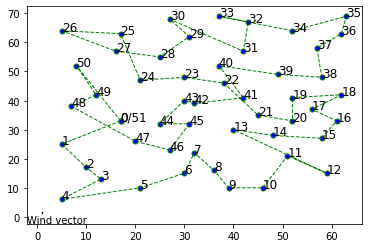

In [59]:
#plotting final solution
plt.plot(x, y, color='green',linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=5) 
for i in range(0,len(x)):
  if(i==len(x)-1):
    plt.text(x[0],y[0],"0/"+str(i),fontsize=12)
  else:
    plt.text(x[i],y[i],str(i),fontsize=12)
plt.quiver(1,1,Vwind[0],Vwind[1],scale=1000)
plt.text(-2,-2,"Wind vector")
plt.show()


In [60]:
Vwind

[4.2261826174069945, 9.063077870366499]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


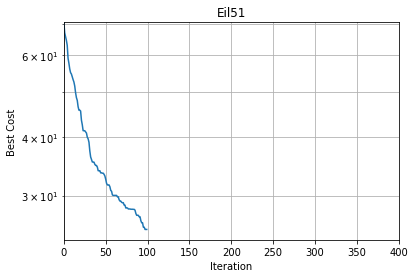

In [61]:
## Results ##
import matplotlib.pyplot as plot
Y = BestCost
X = []
for i in range(len(Y)):
    X.append(i)
# Display grid
plot.grid(True, which="both")
# Linear X axis, Logarithmic Y axis
plot.semilogy(X, Y)
plot.ylim([0,BestCost[0]])
plot.xlim([0, 400])
# Provide the title for the semilog plot
plot.title(Prob)
plot.xlabel('Iteration')
plot.ylabel('Best Cost')
plot.show()



In [62]:
print("BestCost:",BestCost[it])

BestCost: [25.38223417]


In [63]:
time=0
for i in range(0,len(x)-1):
  if(i==len(x)-2):
    time+=D[0][len(x)-2]
  else:
    time+=D[BestPos[it][i+1]][BestPos[it][i]]
print(time,"hr")


25.813243070762645 hr


In [64]:
print("Duration Matrix:","\n",D)

Duration Matrix: 
 [[0.         0.49728403 0.60174568 ... 1.62822424 1.21318837 1.12030358]
 [0.59871467 0.         0.46216235 ... 1.62980891 0.84576321 1.45595524]
 [1.43539026 1.18984737 0.         ... 2.84687082 1.96630877 2.60963158]
 ...
 [0.91722729 0.65742228 1.12570313 ... 0.         0.37344605 0.93635661]
 [0.97787701 0.50485434 0.88207615 ... 0.94895694 0.         1.35023913]
 [0.43066599 0.69809735 1.02973397 ... 1.08732749 1.0037565  0.        ]]
